# Data Collection

In [1]:
# getting the data and reading it
!pip install -q wget
import wget
import pandas as pd
import numpy as np
wget.download('https://www.abs.gov.au/statistics/labour/employment-and-unemployment/labour-force-australia-detailed/nov-2021/EQ09.xlsx')
wget.download('https://www.abs.gov.au/statistics/labour/employment-and-unemployment/labour-force-australia-detailed/nov-2021/EQ03.xlsx')
wget.download('https://www.abs.gov.au/statistics/labour/employment-and-unemployment/labour-force-australia-detailed/nov-2021/EQ07a.xlsx')

You should consider upgrading via the 'c:\users\rolle\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


  9% [.......                                                                   ]  720896 / 7230446

 20% [...............                                                           ] 1499136 / 7230446

 31% [.......................                                                   ] 2277376 / 7230446

 42% [...............................                                           ] 3047424 / 7230446

 53% [.......................................                                   ] 3850240 / 7230446

 64% [...............................................                           ] 4636672 / 7230446

 75% [.......................................................                   ] 5423104 / 7230446

 85% [...............................................................           ] 6168576 / 7230446

 96% [.......................................................................   ] 6963200 / 7230446

100% [..........................................................................] 9883251 / 9883251

'EQ07a.xlsx'

# Data Profiling

In [2]:
# function to read data as a dataframe
def read_data(filename):
    '''
    This function reads the excel data.
    Argument:
    filename -- indicates the real filename that needs to be read as a dataframe
    Return: Dataframe
    '''
    df = pd.read_excel(filename, sheet_name='Data 1', header=None) 
    return df

In [3]:
df_first = read_data('EQ09.xlsx')
df_first.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Australian Bureau of Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6291.0.55.001 - EQ09 - Employed persons by Ind...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Released at 11.30 am (Canberra time) 23 Decemb...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,© Commonwealth of Australia 2021
3,Mid-quarter month,Sex,Industry division of main job: ANZSIC (2006) R...,Occupation major group of main job: ANZSCO (20...,Employed full-time ('000),Employed part-time ('000),Number of hours actually worked in all jobs (e...,Number of hours actually worked in all jobs (e...,NaN,NaN,NaN,NaN,NaN,NaN
4,1986-08-01 00:00:00,Males,"Agriculture, Forestry and Fishing",Managers,176.543735,10.977368,9781.46825,175.265252,NaN,NaN,NaN,NaN,NaN,NaN


It can be seen that rows above the fourth index (3) are irrelevant, so we need to remove those rows. Also, the header row is at the fourth index (3), so it needs to be reinstated as a header. In the given dataset, only the data till the first eight columns are relevant remaining columns are all NaNs. Furthermore, the numbers are in the thousand number format, it needs to be converted back to the original figure for easy analysis. For ease, renaming the existing columns needs to be done. Also, only industry relevant to the tech sector needs to be filtered out as the dataframe contains the data for all industries.

In [4]:
df_second = read_data('EQ03.xlsx')
df_second.head(7)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Australian Bureau of Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6291.0.55.001 - EQ03 - Employed persons by Gre...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Released at 11.30 am (Canberra time) 23 Decemb...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,© Commonwealth of Australia 2021
3,Mid-quarter month,Sex,Greater capital city and rest of state (GCCSA)...,Industry division of main job: ANZSIC (2006) R...,Employed full-time ('000),Employed part-time ('000),Number of hours actually worked in all jobs (e...,Number of hours actually worked in all jobs (e...,NaN,NaN,NaN,NaN,NaN,NaN
4,1984-11-01 00:00:00,Males,Sydney (old standards) [1960-1991],"Agriculture, Forestry and Fishing",7.205404,0.920765,389.063036,11.774114,NaN,NaN,NaN,NaN,NaN,NaN
5,1984-11-01 00:00:00,Males,Sydney (old standards) [1960-1991],Mining,4.83253,0,184.71542,0,NaN,NaN,NaN,NaN,NaN,NaN
6,1984-11-01 00:00:00,Males,Sydney (old standards) [1960-1991],Manufacturing,196.509513,6.155991,7933.446386,141.814127,NaN,NaN,NaN,NaN,NaN,NaN


Similar to the previous dataframe, rows above index number 3 are extraneous, and the header is present in index number 3. Similarly, the data till the first eight columns are relevant as the remaining all are NaNs. The numbers are in the thousand forms. In this dataframe too, renaming of columns can make interpretation easy. Filtering based on relevant tech industries needs to be performed too. The additional operation required for this dataset is the merging of different places into one single state as states are divided into greater capital and other names such as Greater Sydney, Rest of NSW, Balance of New South Wales etc. Thus, these divisions need to be replaced by the corresponding unionised state name.

In [5]:
df_third = read_data('EQ07a.xlsx')
df_third.head(7)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Australian Bureau of Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6291.0.55.001 - EQ07a - Employed persons by Ag...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Released at 11.30 am (Canberra time) 23 Decemb...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,© Commonwealth of Australia 2021
3,Mid-quarter month,Sex,Age,Occupation sub-major group of main job: ANZSCO...,Employed full-time ('000),Employed part-time ('000),Number of hours actually worked in all jobs (e...,Number of hours actually worked in all jobs (e...,NaN,NaN,NaN,NaN,NaN,NaN
4,1986-08-01 00:00:00,Males,15-24 years,"Chief Executives, General Managers and Legisla...",1.131601,0.018432,44.921948,0.341481,NaN,NaN,NaN,NaN,NaN,NaN
5,1986-08-01 00:00:00,Males,15-24 years,Farmers and Farm Managers,11.28849,0.968397,554.892095,7.203802,NaN,NaN,NaN,NaN,NaN,NaN
6,1986-08-01 00:00:00,Males,15-24 years,Specialist Managers,5.652841,0.351048,258.145457,4.972967,NaN,NaN,NaN,NaN,NaN,NaN


For this dataset too, transformations similar to the above two datasets need to be applied as the issues are similar to the above datasets. The only new step required for this dataset is that we need to only extract the occupations relevant to the tech sector.

# Data Wrangling

Based on the issues identified in the profiling steps, we perform the necessary steps in this stage for corresponding datasets.

In [6]:
# function to perform preprocessing of the datasets
def wrangler(df, col_index, list_column, relevant):  
    '''
    This function performs the basic preprocessing steps identified in the profiling stage for each dataset.
    Argument:
    df -- the dataframe that needs to be transformed
    col_index -- the column index of the industry or occupation
    list-column -- list of names that are used to rename the dataframe
    relevant -- list of strings that indicate corresponding tech relevant industries or occupations
    Return: Dataframe
    '''
    df.columns =df.loc[3] # making index 3 row as a header 
    df.drop(df.index[0:4], inplace=True) # deleting the rows before the fifth rows
    df = df.iloc[:,0:8] # selecting the columns till index 7
    
    # selecting relevant tech industries/ occupations
    df = df.loc[df.iloc[:,col_index].isin(relevant)]
        
    # resetting the index
    df.reset_index(drop=True, inplace=True)
    
    # converting the numbers that are formatted in thousands back to the full figure
    df.iloc[:,4:] *= 1000
    
    # renaming columns
    df.columns = list_column
    
    # removing time part from the date column
    df['date'] = df['date'].apply(lambda x: x.strftime('%Y-%m-%d'))
    
    # rounding the figures to two decimal places
    cols = df.iloc[:,4:].columns.tolist()
    df.loc[:,cols] = df.loc[:,cols].astype(float).round(2)
    return df

In [7]:
# transforming the first dataframe
list_column = ['date', 'sex', 'industry', 'occupation_type', 'fulltime_employees', 'parttime_employees', 'fulltime_hours', 'parttime_hours']
# selecting only 'Information Media and Telecommunications' and 'Professional, Scientific and Technical Services' as they are 
# tech sectors according to the job types present in them as seen in the labour market information portal
relevant = ['Information Media and Telecommunications', 'Professional, Scientific and Technical Services']
df1 = wrangler(df_first, 2, list_column, relevant)
df1

,date,sex,industry,occupation_type,fulltime_employees,parttime_employees,fulltime_hours,parttime_hours
0,1986-08-01,Males,Information Media and Telecommunications,Managers,8750.92,358.61,393923.09,8549.3
1,1986-08-01,Males,Information Media and Telecommunications,Professionals,16016.24,2682.05,671085.29,41412.7
2,1986-08-01,Males,Information Media and Telecommunications,Technicians and Trades Workers,44097.86,1074.04,1586869.62,23248.24
3,1986-08-01,Males,Information Media and Telecommunications,Community and Personal Service Workers,1378.45,378.09,33222.68,3514.82
4,1986-08-01,Males,Information Media and Telecommunications,Clerical and Administrative Workers,18377.96,1991.27,644091.13,44768.38
...,...,...,...,...,...,...,...,...
4470,2021-11-01,Females,"Professional, Scientific and Technical Services",Community and Personal Service Workers,2654.11,1561.66,90933.12,42400.16
4471,2021-11-01,Females,"Professional, Scientific and Technical Services",Clerical and Administrative Workers,81570.55,67161.46,3092617.47,1187265.53
4472,2021-11-01,Females,"Professional, Scientific and Technical Services",Sales Workers,7431.24,5615.66,304802.49,82732.87
4473,2021-11-01,Females,"Professional, Scientific and Technical Services",Machinery Operators and Drivers,0.0,783.93,0.0,12542.86


In [8]:
# transforming the second dataframe
list_column = ['date', 'sex', 'state', 'industry', 'fulltime_employees', 'parttime_employees', 'fulltime_hours', 'parttime_hours']
df2 = wrangler(df_second, 3, list_column, relevant)
df2

,date,sex,state,industry,fulltime_employees,parttime_employees,fulltime_hours,parttime_hours
0,1984-11-01,Males,Sydney (old standards) [1960-1991],Information Media and Telecommunications,27690.93,1742.43,1065716.63,21381.56
1,1984-11-01,Males,Sydney (old standards) [1960-1991],"Professional, Scientific and Technical Services",38093.27,2713.12,1645080.28,36042.31
2,1984-11-01,Males,Balance of New South Wales (old standards) [19...,Information Media and Telecommunications,8353.81,908.81,298494.63,12110.36
3,1984-11-01,Males,Balance of New South Wales (old standards) [19...,"Professional, Scientific and Technical Services",9977.04,841.21,443496.68,9498.14
4,1984-11-01,Males,Melbourne (old standards) [1960-1991],Information Media and Telecommunications,24177.08,1454.22,826990.11,30536.18
...,...,...,...,...,...,...,...,...
8318,2021-11-01,Females,Rest of Tas.,"Professional, Scientific and Technical Services",2109.25,1380.93,81204.57,21959.47
8319,2021-11-01,Females,Northern Territory,Information Media and Telecommunications,313.59,148.97,12663.77,4053.74
8320,2021-11-01,Females,Northern Territory,"Professional, Scientific and Technical Services",2516.88,982.13,89088.32,12233.59
8321,2021-11-01,Females,Australian Capital Territory,Information Media and Telecommunications,900.36,338.14,35630.74,6392.88


In [9]:
# additional steps for the second dataframe
def state_unifier(df, dict_state_names):
    for i in dict_state_names:
        df.loc[df['state'].str.contains(dict_state_names[i]), 'state'] = i
    return df

dict_state_names = {'NSW':'Sydney|New South Wales|NSW', 'Victoria':'Melbourne|Victoria|Vic',\
                    'Queensland':'Brisbane|Queensland|Qld', 'South Australia':'Adelaide|South Australia|SA',\
                   'Western Australia':'Perth|Western Australia|WA', 'Tasmania':'Tasmania|Hobart|Tas'}

df2 = state_unifier(df2, dict_state_names)
df2

,date,sex,state,industry,fulltime_employees,parttime_employees,fulltime_hours,parttime_hours
0,1984-11-01,Males,NSW,Information Media and Telecommunications,27690.93,1742.43,1065716.63,21381.56
1,1984-11-01,Males,NSW,"Professional, Scientific and Technical Services",38093.27,2713.12,1645080.28,36042.31
2,1984-11-01,Males,NSW,Information Media and Telecommunications,8353.81,908.81,298494.63,12110.36
3,1984-11-01,Males,NSW,"Professional, Scientific and Technical Services",9977.04,841.21,443496.68,9498.14
4,1984-11-01,Males,Victoria,Information Media and Telecommunications,24177.08,1454.22,826990.11,30536.18
...,...,...,...,...,...,...,...,...
8318,2021-11-01,Females,Tasmania,"Professional, Scientific and Technical Services",2109.25,1380.93,81204.57,21959.47
8319,2021-11-01,Females,Northern Territory,Information Media and Telecommunications,313.59,148.97,12663.77,4053.74
8320,2021-11-01,Females,Northern Territory,"Professional, Scientific and Technical Services",2516.88,982.13,89088.32,12233.59
8321,2021-11-01,Females,Australian Capital Territory,Information Media and Telecommunications,900.36,338.14,35630.74,6392.88


In [10]:
# checking the grouped count
df2.groupby('state').count()

,date,sex,industry,fulltime_employees,parttime_employees,fulltime_hours,parttime_hours
state,,,,,,,
Australian Capital Territory,596,596,596,596,596,596,596
NSW,1192,1192,1192,1192,1192,1192,1192
Northern Territory,596,596,596,596,596,596,596
Queensland,1192,1192,1192,1192,1192,1192,1192
South Australia,1180,1180,1180,1180,1180,1180,1180
Tasmania,1192,1192,1192,1192,1192,1192,1192
Victoria,1192,1192,1192,1192,1192,1192,1192
Western Australia,1183,1183,1183,1183,1183,1183,1183


In [11]:
# merging the data containing common state names, date, sex and industry
df2 = df2.groupby(['industry','sex','state','date']).sum().reset_index()
df2

,industry,sex,state,date,fulltime_employees,parttime_employees,fulltime_hours,parttime_hours
0,Information Media and Telecommunications,Females,Australian Capital Territory,1984-11-01,851.96,174.53,34154.69,3846.44
1,Information Media and Telecommunications,Females,Australian Capital Territory,1985-02-01,1056.33,159.04,37681.56,2111.94
2,Information Media and Telecommunications,Females,Australian Capital Territory,1985-05-01,1091.45,354.85,39117.19,6360.39
3,Information Media and Telecommunications,Females,Australian Capital Territory,1985-08-01,1108.43,421.27,40989.47,7781.85
4,Information Media and Telecommunications,Females,Australian Capital Territory,1985-11-01,1089.79,412.13,39782.32,7600.21
...,...,...,...,...,...,...,...,...
4763,"Professional, Scientific and Technical Services",Males,Western Australia,2020-11-01,56439.13,10239.60,2436917.57,151856.09
4764,"Professional, Scientific and Technical Services",Males,Western Australia,2021-02-01,53549.04,6706.12,2251251.39,117383.47
4765,"Professional, Scientific and Technical Services",Males,Western Australia,2021-05-01,54813.30,8918.03,2377963.36,178207.33
4766,"Professional, Scientific and Technical Services",Males,Western Australia,2021-08-01,57193.03,8335.82,2214821.40,144666.50


In [12]:
# transforming the third dataset
# before transforming we need to identify the relevant tech occupations
df_third.iloc[4:,3].unique()

array(['Chief Executives, General Managers and Legislators',
       'Farmers and Farm Managers', 'Specialist Managers',
       'Hospitality, Retail and Service Managers',
       'Arts and Media Professionals',
       'Business, Human Resource and Marketing Professionals',
       'Design, Engineering, Science and Transport Professionals',
       'Education Professionals', 'Health Professionals',
       'ICT Professionals', 'Legal, Social and Welfare Professionals',
       'Engineering, ICT and Science Technicians',
       'Automotive and Engineering Trades Workers',
       'Construction Trades Workers',
       'Electrotechnology and Telecommunications Trades Workers',
       'Food Trades Workers', 'Skilled Animal and Horticultural Workers',
       'Other Technicians and Trades Workers',
       'Health and Welfare Support Workers', 'Carers and Aides',
       'Hospitality Workers', 'Protective Service Workers',
       'Sports and Personal Service Workers',
       'Office Managers and Prog

In [13]:
# from all occupations we only select relevant tech occupations
# specifying the relevant tech occupations
relevant = ['Design, Engineering, Science and Transport Professionals', 'ICT Professionals',\
               'Engineering, ICT and Science Technicians', 'Electrotechnology and Telecommunications Trades Workers',\
               'Other Technicians and Trades Workers', 'Technicians and Trades Workers nfd']
list_column = ['date', 'sex', 'age', 'occupation', 'fulltime_employees', 'parttime_employees', 'fulltime_hours', 'parttime_hours']
df3 = wrangler(df_third, 3, list_column, relevant)
df3

,date,sex,age,occupation,fulltime_employees,parttime_employees,fulltime_hours,parttime_hours
0,1986-08-01,Males,15-24 years,"Design, Engineering, Science and Transport Pro...",9849.23,1354.51,372743.85,34163.41
1,1986-08-01,Males,15-24 years,ICT Professionals,5876.32,225.97,223685.97,5013.43
2,1986-08-01,Males,15-24 years,"Engineering, ICT and Science Technicians",14483.46,479.38,523348.51,11243.11
3,1986-08-01,Males,15-24 years,Electrotechnology and Telecommunications Trade...,37797.12,1046.02,1443568.56,28599.69
4,1986-08-01,Males,15-24 years,Other Technicians and Trades Workers,36264.93,834.17,1402367.9,18480.18
...,...,...,...,...,...,...,...,...
8696,2021-11-01,Females,55-64 years,Other Technicians and Trades Workers,9888.48,10005.74,387859.72,168327.97
8697,2021-11-01,Females,65 years and over,"Design, Engineering, Science and Transport Pro...",2564.25,0.0,93721.0,0.0
8698,2021-11-01,Females,65 years and over,ICT Professionals,0.0,741.81,0.0,11127.2
8699,2021-11-01,Females,65 years and over,"Engineering, ICT and Science Technicians",0.0,713.85,0.0,6495.02


For our analysis, we can use these three dataframes in isolation since all necessary information is present in a single dataframe so each dataframe can act as a standalone dataframe for analysis. This also removes the need to perform dataframe joining, and the join between these datasets is possible through a one to one relationship, so there is no need to undertake extra overheads from the join operation.

# Checking Missing Values

In [14]:
# counting the missing values for each dataset
list_df = [df1, df2, df3]
for i in range(len(list_df)):
    print(list_df[i].isnull().sum())
    print('\n')

date                  0
sex                   0
industry              0
occupation_type       0
fulltime_employees    0
parttime_employees    0
fulltime_hours        0
parttime_hours        0
dtype: int64


industry              0
sex                   0
state                 0
date                  0
fulltime_employees    0
parttime_employees    0
fulltime_hours        0
parttime_hours        0
dtype: int64


date                  0
sex                   0
age                   0
occupation            0
fulltime_employees    0
parttime_employees    0
fulltime_hours        0
parttime_hours        0
dtype: int64




It is seen that no missing values are present in our datasets.

# Exploratory Data Analysis

In [15]:
# our analysis is focused more on the total number of employees rather than studying fulltime and parttime employees in isolation
# defining a function that adds new columns that are helpful in exploratory data analysis such as total employee column etc.
def get_extra_cols(df):
    '''
    This function adds new calculated columns based on the existing data.
    Argument:
    df -- the dataframe that needs the extra columns
    Return: Dataframe
    '''
    # creating a total employee column
    df.loc[:,'total_employees'] =  df['fulltime_employees'] + df['parttime_employees']
    # creating a total hour column
    df.loc[:,'total_hours'] =  df['fulltime_hours'] + df['parttime_hours']
    # creating an hour per employee column
    df['hours_per_employee'] = df.apply(lambda x: 0 if x['total_employees'] == 0 else float(x['total_hours']/x['total_employees']), axis=1)
    # rounding the values of newly created columns
    cols = df.iloc[:,8:].columns.tolist()
    df.loc[:,cols] = df.loc[:,cols].astype(float).round(2)
    return df

df1 = get_extra_cols(df1)
df2 = get_extra_cols(df2)
df3 = get_extra_cols(df3)

**Value Count:** To get an overview of the datasets.

In [16]:
df1.shape

(4475, 11)

The first dataframe contains 4475 rows and 11 columns. Next we need to identify the number of unique values present in the selected columns.

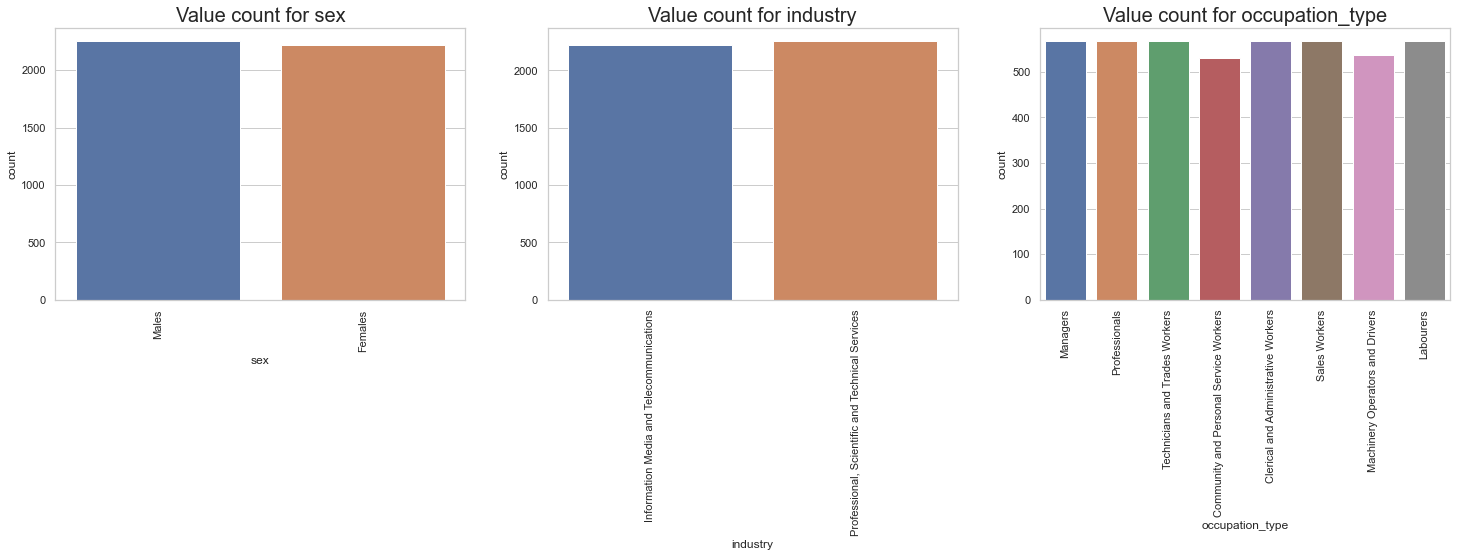

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
sns.set(style = 'whitegrid')

def plot_value_count(df, cols):
    '''
    This function plots a count of unique values in a column.
    Argument:
    df -- the dataframe that supplies the data
    cols -- list of column names 
    Return: None
    '''    
    fig, axes = plt.subplots(1, 3, figsize=(25,5))
    for i, col in enumerate(cols):   
        sns.countplot(x=df[col], ax= axes[i])
        axes[i].set_title('Value count for '+col, fontdict= dict(fontsize=20))
        axes[i].xaxis.set_tick_params(rotation=90)
    plt.show()

# value count plots for the first dataframe    
cols = ['sex', 'industry', 'occupation_type']
plot_value_count(df1, cols)

The above plots give us an idea of how our values in our column look like in the dataset. We can see there is a variation in value counts for different columns. For e.g., Community and personal service workers are less in our dataset.

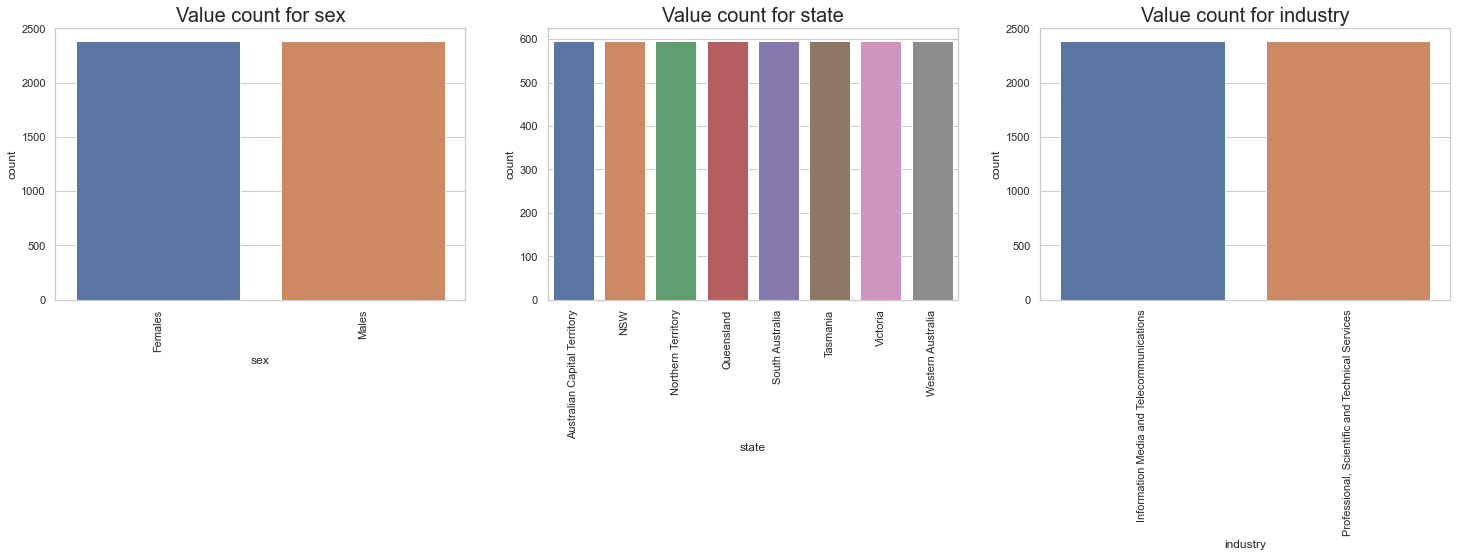

In [18]:
# value count plots for the second dataframe    
cols = ['sex', 'state', 'industry']
plot_value_count(df2, cols)

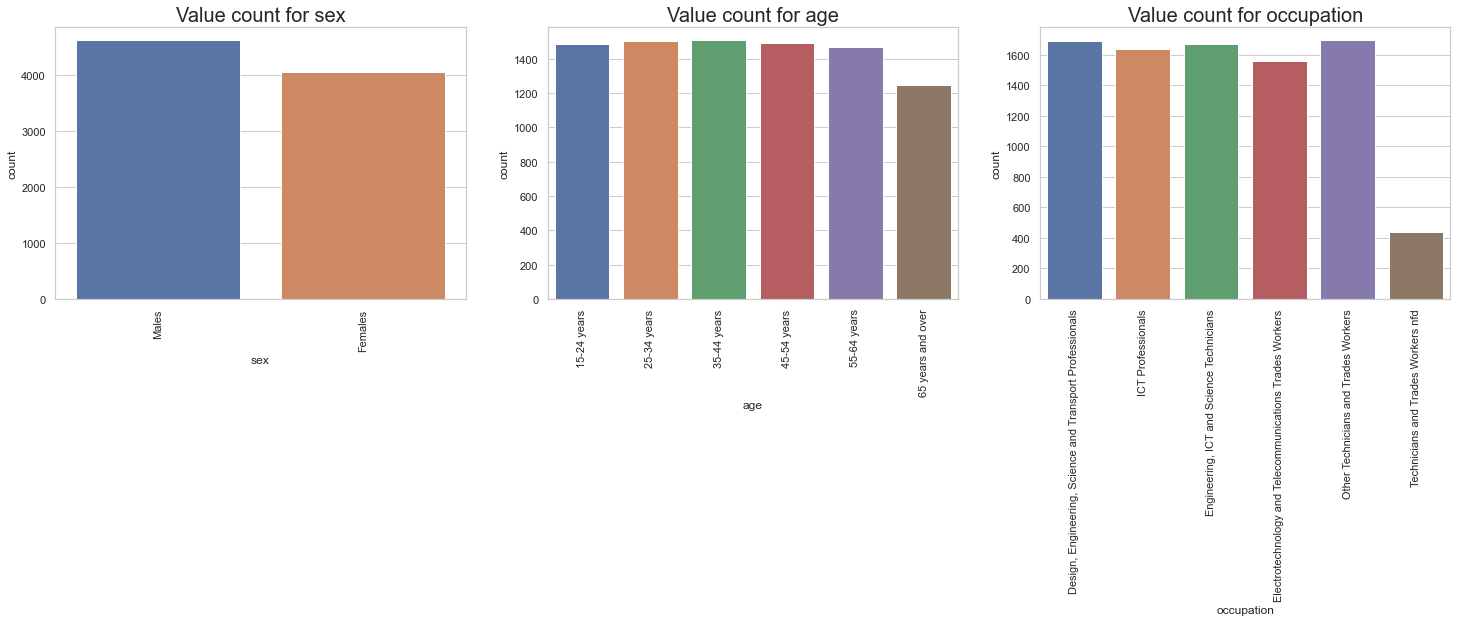

In [19]:
# value count plots for the third dataframe    
cols = ['sex', 'age', 'occupation']
plot_value_count(df3, cols)

From the above count plot for sex, we can see that the figures for both males and females are higher as compared to the male and female figures for the first two dataframes. This indicates that some of the tech occupations we selected contain non-tech people. However, we assume that each occupation in the third dataframe consists of only tech people which is one of the limitations in our analysis.

**Gender Analysis:** For this analysis we use the data for the last five years.

In [20]:
# generating the dataset suitable to the visualisation type

# selecting data beyond November 2015
df1_last5_sex = df1[df1['date'] > '2015-11-01']
# getting the actual numerical data type of columns for aggregation later
df1_last5_sex = df1_last5_sex.infer_objects()
# grouping by gender
df1_last5_sex1 = df1_last5_sex.groupby('sex').mean().reset_index()

# generating a multiindex dataframe that divides gender by each occupation type
df1_last5_sex2 = df1_last5_sex.groupby(['sex','occupation_type']).mean().unstack(level=1)
df1_last5_sex2 = df1_last5_sex2['total_employees']

*Figure 1*

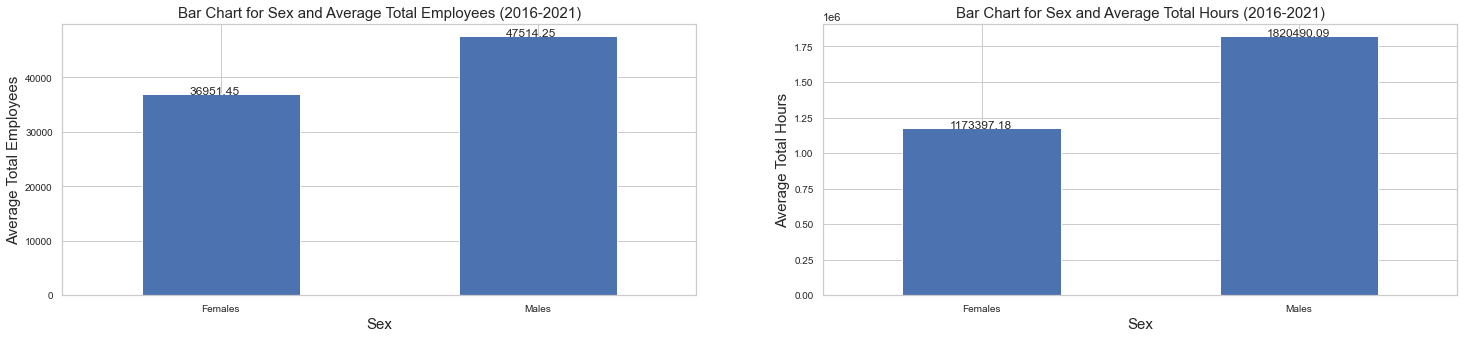

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(25,5))

# plotting sex vs average total employees
ax1 = df1_last5_sex1[['sex','total_employees']].plot(kind='bar', ax=axes[0],\
                                                  legend=False, fontsize=10, rot=0)
ax1.set_ylabel('Average Total Employees', fontsize=15)
ax1.set_xlabel('Sex', fontsize=15)
ax1.set_xticklabels(df1_last5_sex1.sex)
ax1.set_title('Bar Chart for Sex and Average Total Employees (2016-2021)', fontsize=15)
# annotating the bars
x_offset = -0.1
for p in ax1.patches:
    b = p.get_bbox()
    val = '{:.2f}'.format(b.y1 + b.y0)  # formatting the values to two decimal places      
    ax1.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1))

# plotting sex vs average hours 
ax2 = df1_last5_sex1[['sex','total_hours']].plot(kind='bar', ax=axes[1],\
                                                  legend=False, fontsize=10, rot=0)
ax2.set_ylabel('Average Total Hours', fontsize=15)
ax2.set_xlabel('Sex', fontsize=15)
ax2.set_xticklabels(df1_last5_sex1.sex)
ax2.set_title('Bar Chart for Sex and Average Total Hours (2016-2021)', fontsize=15)
x_offset = -0.1
for p in ax2.patches:
    b = p.get_bbox()
    val = '{:.2f}'.format(b.y1 + b.y0)       
    ax2.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1)) 
    
plt.show()

From the above plots, it is seen that there are more male employees. Interestingly, the gap between males and females regarding the total employees is not as large as compared to the gap for the average total hours performed on the job. So, this suggests that females are working more part-time jobs than males. 

*Figure 2*

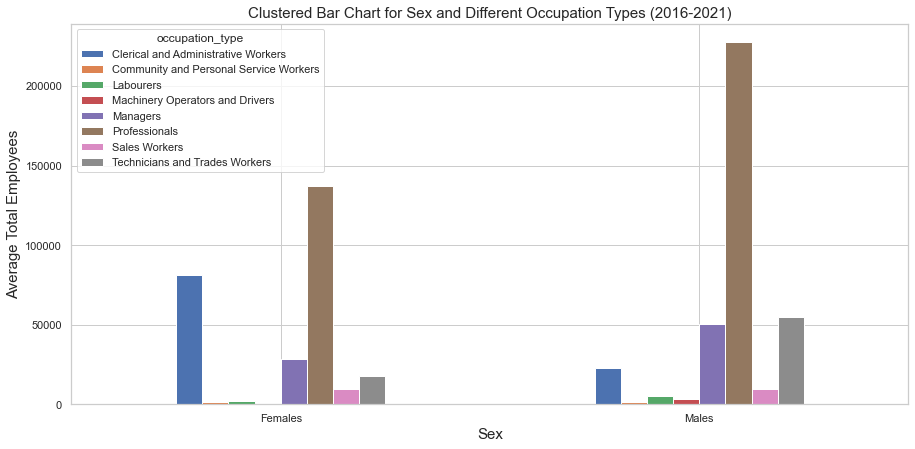

In [22]:
ax = df1_last5_sex2.plot(kind='bar', legend=True, figsize=(15,7), rot=0)
ax.set_ylabel('Average Total Employees', fontsize=15)
ax.set_xlabel('Sex', fontsize=15)
ax.set_title('Clustered Bar Chart for Sex and Different Occupation Types (2016-2021)', fontsize=15)
plt.show()

From the above plot, it is seen that the distribution of males and females are proportionately the same in all occupation types except for clerical and administrative workers where more proportions of females are higher than males. Also, this occupation type is the second most popular among females. Thus, in the tech industry, more females are taking either professional roles or clerical and administrative roles.

**Age Analysis:** For this analysis too, we take the average values for the last 5 years.

In [23]:
# making data presentation compatible with the type of visualisations used in this analysis
df3_last5_age = df3[df3['date'] > '2015-11-01']
df3_last5_age = df3_last5_age.infer_objects()
df3_last5_age1 = df3_last5_age.groupby('age').mean().reset_index()

*Figure 3*

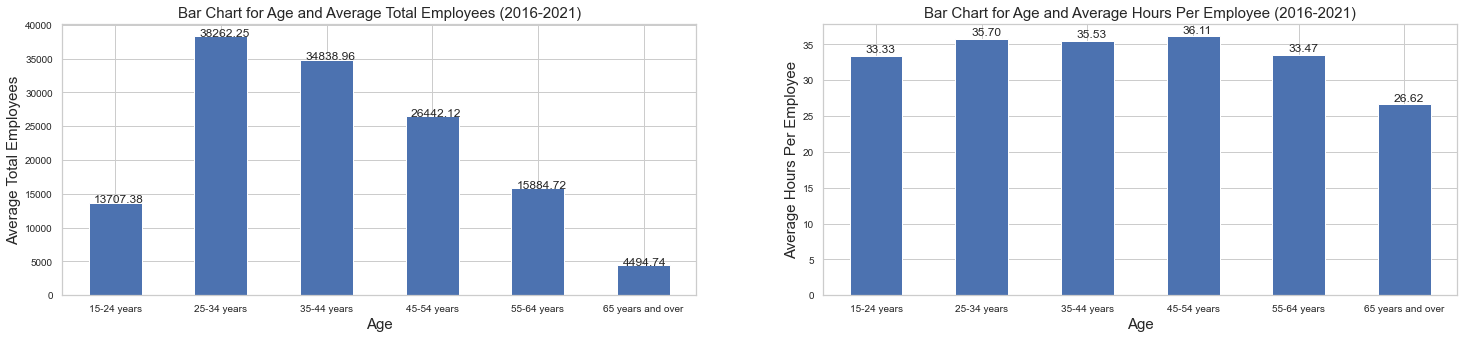

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(25,5))

# plotting age vs average total employees
ax1 = df3_last5_age1[['age','total_employees']].plot(kind='bar', ax=axes[0],\
                                                  legend=False, fontsize=10, rot=0)
ax1.set_ylabel('Average Total Employees', fontsize=15)
ax1.set_xlabel('Age', fontsize=15)
ax1.set_xticklabels(df3_last5_age1.age)
ax1.set_title('Bar Chart for Age and Average Total Employees (2016-2021)', fontsize=15)
x_offset = -0.2
y_offset = 0.1
for p in ax1.patches:
    b = p.get_bbox()
    val = '{:.2f}'.format(b.y1 + b.y0)        
    ax1.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
    
# plotting age vs hours per employee
ax2 = df3_last5_age1[['age','hours_per_employee']].plot(kind='bar', ax=axes[1],\
                                                  legend=False, fontsize=10, rot=0)
ax2.set_ylabel('Average Hours Per Employee', fontsize=15)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_xticklabels(df3_last5_age1.age)
ax2.set_title('Bar Chart for Age and Average Hours Per Employee (2016-2021)', fontsize=15)
x_offset = -0.1
y_offset = 0.5
for p in ax2.patches:
    b = p.get_bbox()
    val = '{:.2f}'.format(b.y1 + b.y0)      
    ax2.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
plt.show()

**Insights:**

From the first graph, it is observed that employee participation in the workforce increases after age 24 but the participation rate continues decreasing after reaching the age of 35 years. Firstly, this may be as people get older they acquire more skills and experience which lead them to acquire higher positions in the company, and those top positions are limited. The people who could not upgrade themselves in terms of skills and experience might be displaced by the newer talents. This signals us that to climb the ladder in the tech industry, one has to improve one's skills continuously to reach the top position in the industry. Secondly, the low participation rate among the 65 plus age group might be the retirement. From a business perspective, a company can set up training programs to upskill a person who is already working in a tech occupation to expedite the promotion in their company and to keep them relevant in the industry.  

From the second figure, we can see that the top positions are acquired by the 45-54 year age group as their average hrs per employee is higher than the other groups, which means the kind of skills and expertise they hold is not present among other people so they are required most in their companies. 

**Occupation Analysis:**

In [25]:
df3['date'] =  pd.to_datetime(df3['date'])
# pivoting the data to create date as an index
df3_occupation = df3.groupby(['date', 'occupation']).sum().unstack()['total_employees']
df3_occupation.index.year

Int64Index([1986, 1986, 1987, 1987, 1987, 1987, 1988, 1988, 1988, 1988,
            ...
            2019, 2019, 2020, 2020, 2020, 2020, 2021, 2021, 2021, 2021],
           dtype='int64', name='date', length=142)

*Figure 4*

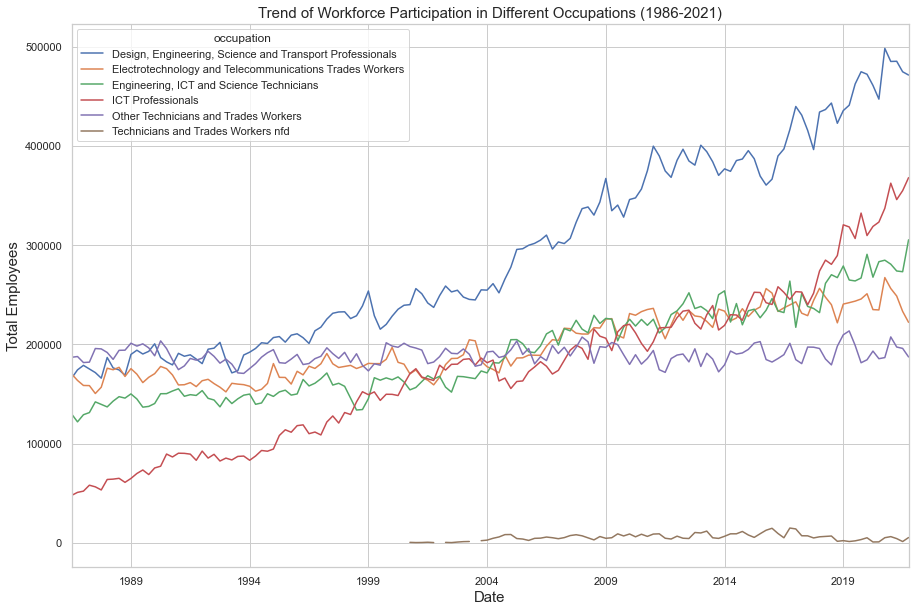

In [26]:
ax = df3_occupation.plot(figsize=(15,10))
ax.set_ylabel('Total Employees', fontsize=15)
ax.set_xlabel('Date', fontsize=15)
ax.set_title('Trend of Workforce Participation in Different Occupations (1986-2021)', fontsize=15)
plt.show()

From the above chart, we can see an upward trend for three job groups. They are design, engineering, science and transport professionals, engineering, ICT and science technicians and ICT professionals. The remaining groups are showing somewhat of a static trend. The plots for the occupation groups display wide fluctuations due to the presence of some seasonality in them. Smoothing can remove those fluctuations.

In [27]:
df3_last5_occ = df3[df3['date'] > '2015-11-01']
df3_last5_occ = df3_last5_occ.infer_objects()
df3_last5_occ = df3_last5_occ.groupby('occupation').mean().reset_index()

df3_last5_age2 = df3_last5_age.groupby(['age','occupation']).mean().unstack(level=1)
df3_last5_age2 = df3_last5_age2['total_employees']

*Figure 5*

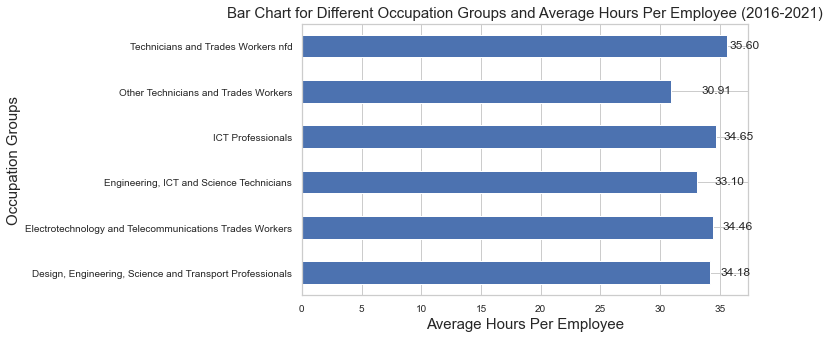

In [28]:
# plotting occupation vs average hours per employee
ax1 = df3_last5_occ[['occupation','hours_per_employee']].plot(kind='barh',\
                                                  legend=False, fontsize=10, rot=0, figsize=(8,5))
ax1.set_xlabel('Average Hours Per Employee', fontsize=15)
ax1.set_ylabel('Occupation Groups', fontsize=15)
ax1.set_yticklabels(df3_last5_occ.occupation)
ax1.set_title('Bar Chart for Different Occupation Groups and Average Hours Per Employee (2016-2021)', fontsize=15)
x_offset = 18
y_offset = -0.3
for p in ax1.patches:
    b = p.get_bbox()
    val = '{:.2f}'.format(b.x1 + b.x0)        
    ax1.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))

The hours per employee for various occupation groups are in a similar range except for other technicians (30.91), which is the lowest one and technicians and trades workers (35.60), which is the highest one.

*Figure 6*

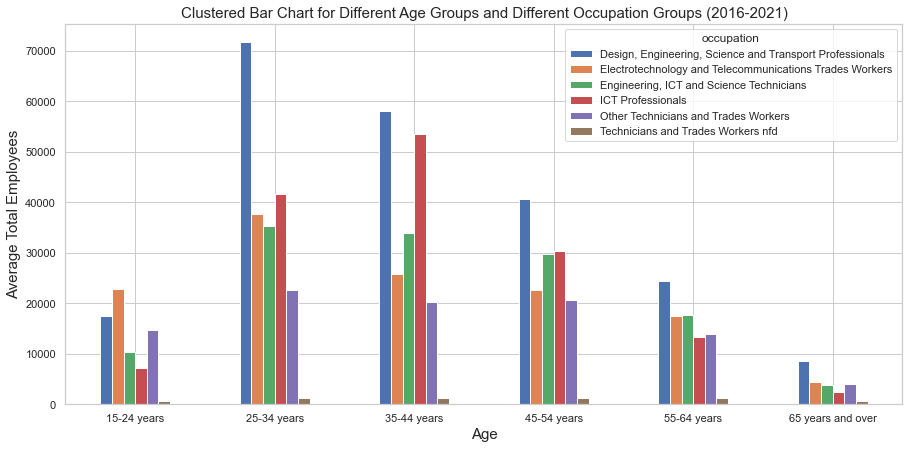

In [29]:
ax = df3_last5_age2.plot(kind='bar', legend=True, figsize=(15,7), rot=0)
ax.set_ylabel('Average Total Employees', fontsize=15)
ax.set_xlabel('Age', fontsize=15)
ax.set_title('Clustered Bar Chart for Different Age Groups and Different Occupation Groups (2016-2021)', fontsize=15)
plt.show()

**Insights**:

In figure 6, the proportionate distribution of people in each category for various occupation groups is fairly the same. However, in the age bracket 15-24, electrotechnology and telecommunications trades workers are higher than the remaining categories. From figure 5, it was established that the average hours per employee are almost the same except for two occupation groups. Although many young people are interested in the electrotechnology sector, the demand in this sector is not high. If it was high then the hours per employee should be higher than the other occupation groups which is not the case as seen in figure 5. So, if these young people do not want to change their job in the near future then they might have difficulty in finding work in their preferred field as the demand is not high for that job. Moreover, in figure 4, we can see that the job trend for the electrotechnology sector is fairly static. Thus, the better path for those young people would be choosing one out of the three growing sectors. To be precise, thinking of a career in the ICT professional sector would be wise as this sector is rapidly growing in the last three years as seen in figure 4, and the hours per employee in this sector is higher than the other two growing occupation groups which further solidifies the point that this sector is booming in the future too.  

**Location Analysis:**

In [30]:
df2['date'] =  pd.to_datetime(df2['date'])
df2_state = df2.groupby(['date', 'state']).sum().unstack()['total_employees']

df2_last5_state = df2[df2['date'] > '2015-11-01']
# creating a column with constant value
df2_last5_state1 = df2_last5_state.assign(loc='State')
df2_last5_state1 = df2_last5_state1.groupby(['loc','state'])['total_employees'].mean().unstack()
# sorting the columns based on the first row values
df2_last5_state1 = df2_last5_state1.sort_values(by=df2_last5_state1.index[0], ascending=True, axis=1)

df2_last5_state2 = df2_last5_state.groupby('state').mean().reset_index()

*Figure 7*

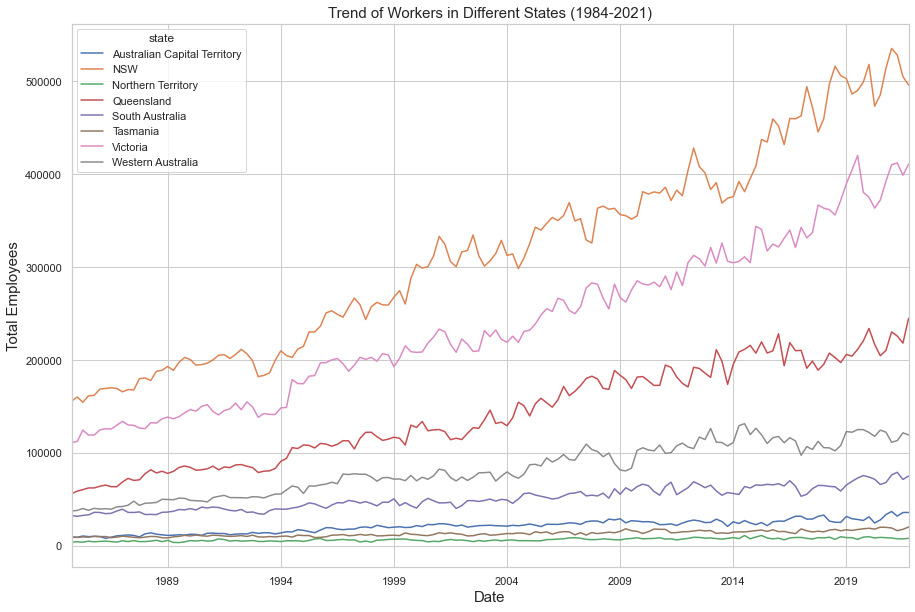

In [31]:
ax = df2_state.plot(figsize=(15,10))
ax.set_ylabel('Total Employees', fontsize=15)
ax.set_xlabel('Date', fontsize=15)
ax.set_title('Trend of Workers in Different States (1984-2021)', fontsize=15)
plt.show()

The trend of workforce growth is upward for five states with NSW and Victoria rising swiftly followed by Queensland while the growth is static for Northern Territory and Tasmania. 

*Figure 8*

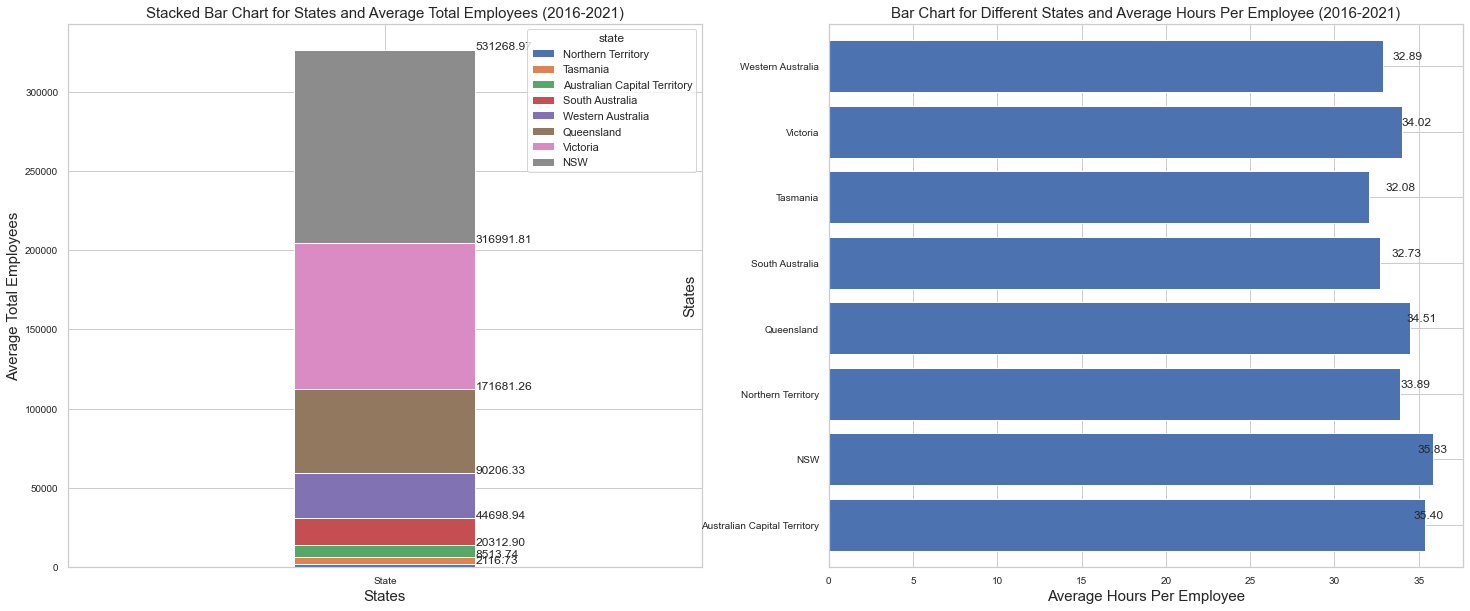

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(25,10))

# plotting state vs average total employees
ax1 = df2_last5_state1.plot(kind='bar', ax=axes[0],\
                                                  legend=True, fontsize=10, rot=0, stacked=True, width=0.2)
ax1.set_ylabel('Average Total Employees', fontsize=15)
ax1.set_xlabel('States', fontsize=15)
ax1.set_title('Stacked Bar Chart for States and Average Total Employees (2016-2021)', fontsize=15)
x_offset = 0.1
y_offset = 0.4
for p in ax1.patches:
    b = p.get_bbox()
    val = '{:.2f}'.format(b.y1 + b.y0)        
    ax1.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
    
# plotting occupation vs average hours per employee
ax2 = df2_last5_state2[['state','hours_per_employee']].plot(kind='barh', ax=axes[1],\
                                                  legend=False, fontsize=10, rot=0, width=0.8)
ax2.set_xlabel('Average Hours Per Employee', fontsize=15)
ax2.set_ylabel('States', fontsize=15)
ax2.set_yticklabels(df2_last5_state2.state)
ax2.set_title('Bar Chart for Different States and Average Hours Per Employee (2016-2021)', fontsize=15)
x_offset = 17
y_offset = -0.3
for p in ax2.patches:
    b = p.get_bbox()
    val = '{:.2f}'.format(b.x1 + b.x0)        
    ax2.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))

**Insights:**

From the above bar chart between states and average hours per employee, it is seen that NSW and Australian Capital Territory (ACT) had the two highest average hours per employee figures. Even though NSW had the highest number of workers among other states, as seen in the stacked bar chart, the demand for tech roles are still high in that state as the hours per employee figure is the highest. Also, from figure 7, it can be seen that the trend of employee participation in the workforce is rapidly growing in NSW. Likewise, ACT had the highest hours per employee rate but the workforce in that territory is not big as in NSW as seen in the stacked bar chart. This suggests that there are many positions in the tech industry in the ACT that are vacant and covered by the existing employees. From figure 7, it is seen that the trend for ACT is upward but in a gradual manner. Putting the insights together, the reason for ACT not being able to show a rapid growth like NSW in spite of a similar rate of demands might be due to some extra requirements for people to work in the ACT tech industries such as security clearances.

On the other hand, Tasmania had low employee participation and low hours per employee in the past five years, and the trend for this state is static. So, Tasmania needs some major projects to be able to employ more people in the tech industry.

To sum up, tech jobs are high in demand in NSW and ACT but low in Tasmania. Anyone looking for a tech career can think of working in NSW but if that person can fulfil the extra requirements then the job prospect is good in ACT too. Furthermore, from the insights obtained through the above visuals, a tech career in Tasmania is difficult to achieve.

**Work Load Analysis:**

In [33]:
df1['date'] =  pd.to_datetime(df1['date'])
df1_occupation_type = df1.groupby(['date', 'occupation_type']).sum().unstack()['hours_per_employee']

*Figure 9*

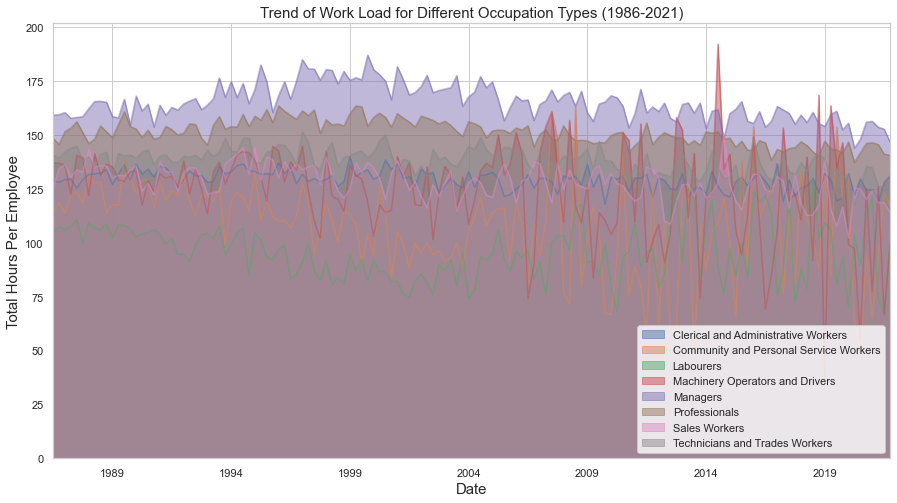

In [34]:
ax = df1_occupation_type.plot(kind='area', figsize=(15,8), stacked=False)
ax.set_ylabel('Total Hours Per Employee', fontsize=15)
ax.set_xlabel('Date', fontsize=15)
ax.set_title('Trend of Work Load for Different Occupation Types (1986-2021)', fontsize=15)
plt.legend(loc='lower right')
plt.show()

**Insights:**

The above graph is not easy to analyse individual trends, and too many fluctuations can be seen in the graph as the data is not adjusted for seasonality. Regarding the insights, we can clearly see that managers had the highest workload among all occupation types over the years. The positive part is that with time the workload has been gradually declining but still taking up the top position in terms of the workload. So, currently, if we are appointing a person as a manager then a thorough assessment about skills, experience and the capacity to handle a high amount of workload needs to be performed before the appointment.

In [35]:
from itertools import cycle

df1_occupation_type2 = df1.groupby(['date', 'occupation_type']).mean().unstack()['hours_per_employee']
# creating a new column quarter that represents the quarter in a year 
quarter = cycle(['Q3', 'Q4', 'Q1', 'Q2'])
df1_occupation_type2['quarter'] = [next(quarter) for x in range(len(df1_occupation_type))]
df1_occupation_type2 = df1_occupation_type2.groupby('quarter').mean()

*Figure 10*

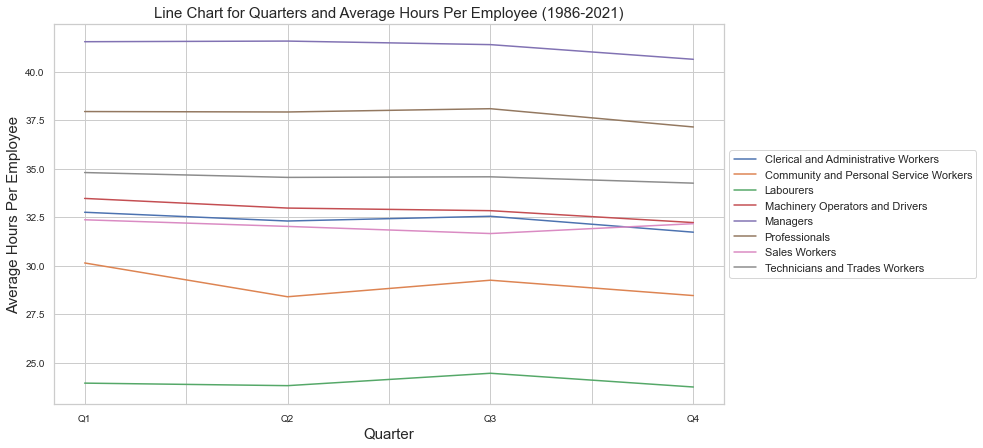

In [36]:
# plotting quarters vs hours per employee
ax = plt.subplot(111)
ax1 = df1_occupation_type2.plot.line(legend=True, ax=ax, fontsize=10, rot=0, figsize=(15,7))
# shrinking current axis by 20% to put the legend information in that 20% space
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# specifying the position of the legend
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax1.set_ylabel('Average Hours Per Employee', fontsize=15)
ax1.set_xlabel('Quarter', fontsize=15)
ax1.set_title('Line Chart for Quarters and Average Hours Per Employee (1986-2021)', fontsize=15)
plt.show()

**Insights:**

From the above plot, it is observed that the hours per employee is higher in different quarters for different occupation types but many occupation types have high hours per employee rate in the first quarter. For example, for community and personal service workers, sales workers, technicians, etc., the rate is high in the first quarter. Similarly, this rate is high in the third quarter for professionals and labourers. Based on the busiest quarter of the year for different occupation types, interns can be hired to perform some simple operations of those employees in the particular industry to reduce some of the workloads of the employees. This will benefit interns, employees and the company since interns can gather experience and employees can free some of the workloads and focus more on the part which requires their technical expertise, and finally, the company can operate at their previous level of employees when things get back to normal without having to hire and fire in the process. 

# Forecasting

To jump straight to the result. <a href='#section1'>Click this link.</a>

In [37]:
# for forecasting purposes, we use the first dataset
import copy
df_forecast_org = copy.deepcopy(df1)

def forecast_maker(df, level='whole'):
    '''
    This function takes a dataframe and converts that dataframe with columns containing necessary values for forecasting.
    Argument:
    df -- the dataframe that is used to generate forecast dataframe 
    level -- to specify whether the dataframe should be presented at an industry level or not. Whole value denotes all
    data and industry value denotes data for Information Media and Telecommunications industry only
    Return: Dataframe
    '''
    
    # selecting the relevant columns
    df = df[['date', 'industry', 'fulltime_employees', 'parttime_employees']]
    if level == 'industry':
        # selecting the industry type
        df = df.loc[df['industry'] == 'Information Media and Telecommunications']
    # calculating the total employees
    df.loc[:,'total_employees'] =  df['fulltime_employees'] + df['parttime_employees']
    # merging the data to get a unique value for a particular date 
    df = df.groupby(['date']).sum().reset_index()
    # converting date column to datetime 
    df['date'] =  pd.to_datetime(df['date'])
    # selecing only the columns that are required for forecasting
    df = df[['date','total_employees']]
    return df

In [38]:
# getting the forecast suitable dataframe for an industry
df_forecast = forecast_maker(df_forecast_org, 'industry')
df_forecast.head(5)

,date,total_employees
0,1986-08-01,170173.78
1,1986-11-01,164834.66
2,1987-02-01,163059.79
3,1987-05-01,165700.53
4,1987-08-01,165406.40


*Figure 11*

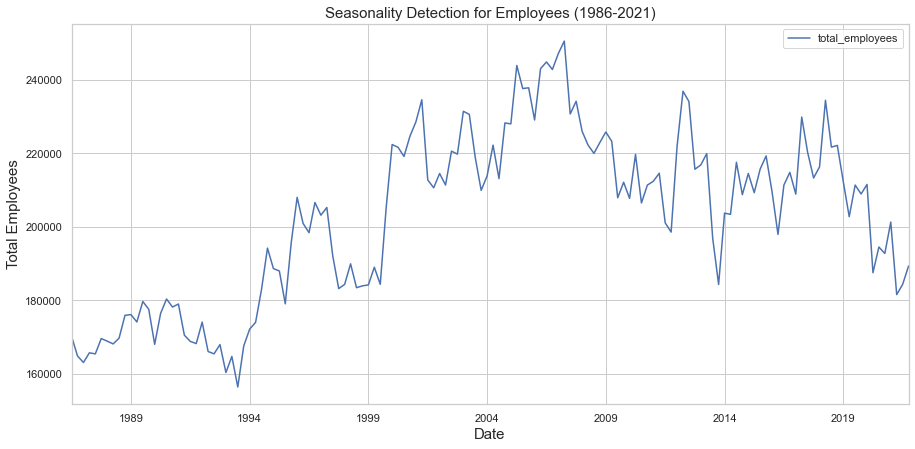

In [39]:
df_forecast.set_index('date', inplace=True)
ax = df_forecast.plot(figsize=(15,7))
ax.set_ylabel('Total Employees', fontsize=15)
ax.set_xlabel('Date', fontsize=15)
ax.set_title('Seasonality Detection for Employees (1986-2021)', fontsize=15)
plt.show()

Overall, there is an upward trend reaching a peak in around 2007 and then falling in the downward direction. Additionally, there is a presence of seasonality with some irregularities. In a particular season of every year, the value reaches a peak and falls downward then after another season it starts to climb. To get a clear view, we can focus on the area after the vertical grid line in 2019. There we can see the repeating patterns for seasons in a year. Also, our data is not stationary.

### Checking Stationarity:

We are determining the stationarity of our dataset in a mathematical way using Augmented Dicky-Fuller Test (adfuller test). However, from figure 11, we already determined that our dataset is not stationary just by seeing the graph as the mean is not constant for each year. We are just using the mathematical approach here.

In [40]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_forecast)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value)) # printing the value with the percentage symbol as a string with three decimal places

ADF Statistic: -2.147860
p-value: 0.225710
Critical Values:
	1%: -3.479
	5%: -2.883
	10%: -2.578


We can see that the adf test statistic (-2.148) is greater than the critical value at a 1% significance level (-3.479). Thus, we cannot reject the null hypothesis that our dataset is not stationary. This further proves that our data has a time-dependent structure. 

### Removing Stationarity:

First, we perform the differencing technique to see if the mean is constant over a period of time, and we can reject the null hypothesis i.e. the data is stationary.

In [41]:
# differencing each value by the previous value in a dataframe
df_new = df_forecast.diff(periods=1)
df_new

,total_employees
date,
1986-08-01,NaN
1986-11-01,-5339.12
1987-02-01,-1774.87
1987-05-01,2640.74
1987-08-01,-294.13
...,...
2020-11-01,-1747.56
2021-02-01,8543.96
2021-05-01,-19746.48


In [42]:
# dropping the first row that contains NaN value produced from differencing otherwise the adfuller test do not work
df_new.dropna(inplace=True)

In [43]:
# building a function to check stationarity using adfuller test and rolling average plot
def stationarity_checker(df):
    '''
    This function plots the rolling average and rolling standard deviation with the original data plus shows the result of 
    adfuller test to detect stationarity.
    Argument:
    df -- the dataframe that contains the time-series data with the date as an index
    Return: None
    '''
    moving_average = df.rolling(window=4).mean()
    moving_std = df.rolling(window=4).std()
    
    plt.plot(df, color='b', label='Original')
    plt.plot(moving_average, color='r', label='Rolling Mean')
    plt.plot(moving_std, color='g', label='Rolling Standard Deviation')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False) # to show the plot as soon as it is calculated
    
    print('Adfuller test:')
    result = adfuller(df)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

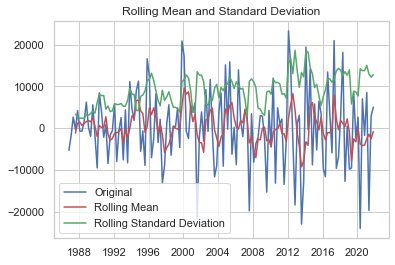

Adfuller test:
ADF Statistic: -6.240374
p-value: 0.000000
Critical Values:
	1%: -3.479
	5%: -2.883
	10%: -2.578


In [44]:
stationarity_checker(df_new)

From the above plot and the adfuller test result, we can confirm that our dataset has no stationarity present in it as the moving average and variance is fairly constant. Also, there is no trend present in our data as seen through the blue colour graph. Moreover, our adf test statistic is less than the critical value at 1% and the p-value is zero. These changes we achieved make our data stationary.

### Building Model:

In [45]:
# dividing the data into training and testing sets
train = df_new[:len(df_new) - 28] # taking all the data for training except for the last 7 years
test = df_new[(len(df_new) - 28):] # taking the last 7 year data as a testing data

In [46]:
print(train.head())
print('\n')
print(test.tail())

            total_employees
date                       
1986-11-01         -5339.12
1987-02-01         -1774.87
1987-05-01          2640.74
1987-08-01          -294.13
1987-11-01          4173.22


            total_employees
date                       
2020-11-01         -1747.56
2021-02-01          8543.96
2021-05-01        -19746.48
2021-08-01          2771.87
2021-11-01          5017.43


<AxesSubplot:xlabel='date'>

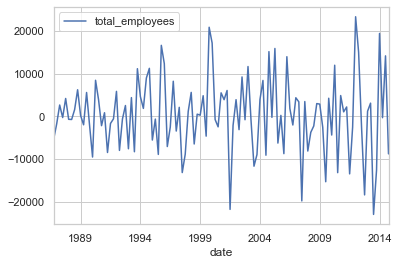

In [47]:
train.plot()

<AxesSubplot:xlabel='date'>

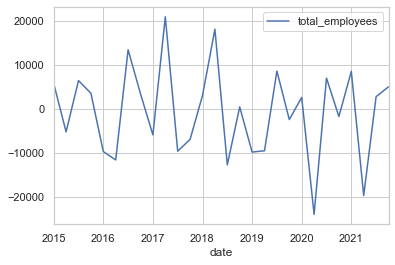

In [48]:
test.plot()

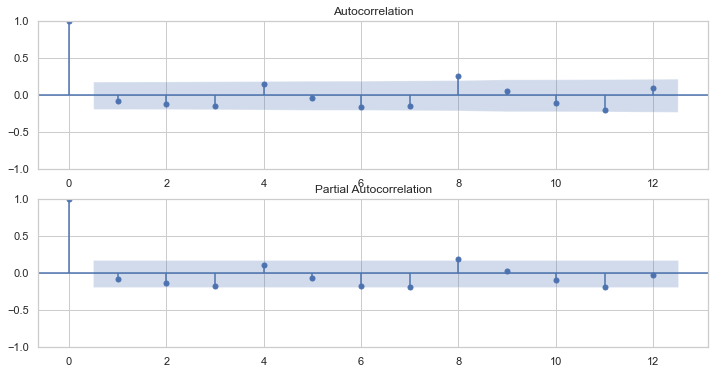

In [49]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')

fig, ax = plt.subplots(2, figsize=(12,6))
ax1 = plot_acf(train, ax=ax[0], lags=12)
ax2 = plot_pacf(train, ax=ax[1], lags=12)

In PACF, no lag can cross the significance line clearly, but in ACF lag 8 managed to do that but still, that is not too clear. It is hard to determine the p and q value for AR and MA.

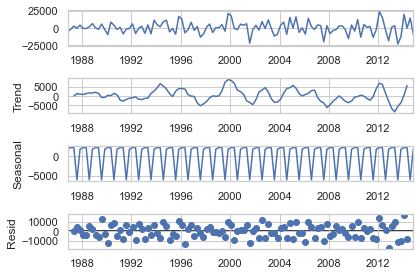

In [50]:
# decomposing trend, seasonality and residuals
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(train, model='additive')
decomp.plot()
plt.show()

We can see that there is no specific trend in our data after removing stationarity but the seasonality is high varying between -5000 to 2500.

In [51]:
import statsmodels.api as sm
import itertools

p = d = q = range(0,2) # specifying the range of hyperparameters p,d,q from 0 to 1 (both inclusive)
pdq = list(itertools.product(p, d, q)) # creating a list containing a cartesian product of p, d and q values
# creating a list containing a cartesian product of p, d and q value with value 4 at the last place for seasonal frequency
pdq_seasonal = [(x[0], x[1], x[2], 4) for x in list(itertools.product(p, d, q))]

In [52]:
# finding the right hyperparameter values with low AIC score
aic_scores = dict()
for order in pdq:
    for seasonal_ord in pdq_seasonal:
        model = sm.tsa.statespace.SARIMAX(train, order=order, seasonal_order=seasonal_ord, enforce_stationarity=False,\
                                         enforce_invertibility=False)
        model_aic = model.fit()
        aic_scores.update({(order, seasonal_ord):model_aic.aic})
        print('ARIMA{}X{}4 with AIC:{}'.format(order, seasonal_ord, model_aic.aic))

ARIMA(0, 0, 0)X(0, 0, 0, 4)4 with AIC:2353.2777929777258
ARIMA(0, 0, 0)X(0, 0, 1, 4)4 with AIC:2273.4334253792686
ARIMA(0, 0, 0)X(0, 1, 0, 4)4 with AIC:2325.0371505929534
ARIMA(0, 0, 0)X(0, 1, 1, 4)4 with AIC:2185.458766756589
ARIMA(0, 0, 0)X(1, 0, 0, 4)4 with AIC:2292.426965626843
ARIMA(0, 0, 0)X(1, 0, 1, 4)4 with AIC:2266.484593796135
ARIMA(0, 0, 0)X(1, 1, 0, 4)4 with AIC:2224.6289101890875
ARIMA(0, 0, 0)X(1, 1, 1, 4)4 with AIC:2185.5257101238894
ARIMA(0, 0, 1)X(0, 0, 0, 4)4 with AIC:2334.2053520578024
ARIMA(0, 0, 1)X(0, 0, 1, 4)4 with AIC:2254.4425584546057
ARIMA(0, 0, 1)X(0, 1, 0, 4)4 with AIC:2306.3946618873265
ARIMA(0, 0, 1)X(0, 1, 1, 4)4 with AIC:2179.713363269797
ARIMA(0, 0, 1)X(1, 0, 0, 4)4 with AIC:2293.9757498417353
ARIMA(0, 0, 1)X(1, 0, 1, 4)4 with AIC:2248.4467097346906
ARIMA(0, 0, 1)X(1, 1, 0, 4)4 with AIC:2233.5196595803463
ARIMA(0, 0, 1)X(1, 1, 1, 4)4 with AIC:2180.718774453662
ARIMA(0, 1, 0)X(0, 0, 0, 4)4 with AIC:2418.4959539230813
ARIMA(0, 1, 0)X(0, 0, 1, 4)4 with AI

In [53]:
# sorting the value in aic_scores dict to find the minimum value
{k : v for k, v in sorted(aic_scores.items(), key=lambda x: x[1])}

{((0, 0, 1), (0, 1, 1, 4)): 2179.713363269797,
 ((0, 0, 1), (1, 1, 1, 4)): 2180.718774453662,
 ((1, 1, 1), (0, 1, 1, 4)): 2181.231672982176,
 ((1, 0, 1), (0, 1, 1, 4)): 2181.7137774734965,
 ((1, 0, 1), (1, 1, 1, 4)): 2181.929223795496,
 ((1, 1, 1), (1, 1, 1, 4)): 2182.14341768064,
 ((0, 1, 1), (0, 1, 1, 4)): 2182.571884648666,
 ((0, 1, 1), (1, 1, 1, 4)): 2183.5746729538296,
 ((0, 0, 0), (0, 1, 1, 4)): 2185.458766756589,
 ((0, 0, 0), (1, 1, 1, 4)): 2185.5257101238894,
 ((1, 0, 0), (0, 1, 1, 4)): 2199.0406106845703,
 ((1, 0, 0), (1, 1, 1, 4)): 2200.033057176046,
 ((1, 0, 0), (1, 1, 0, 4)): 2205.743527408161,
 ((1, 1, 1), (1, 1, 0, 4)): 2209.292164458982,
 ((1, 0, 1), (1, 1, 0, 4)): 2214.4740879083774,
 ((1, 1, 0), (0, 1, 1, 4)): 2217.543011484298,
 ((1, 1, 0), (1, 1, 1, 4)): 2218.7494978175523,
 ((0, 0, 0), (1, 1, 0, 4)): 2224.6289101890875,
 ((1, 1, 0), (1, 1, 0, 4)): 2227.800894827924,
 ((0, 1, 1), (1, 1, 0, 4)): 2231.1326932372885,
 ((0, 0, 1), (1, 1, 0, 4)): 2233.5196595803463,
 ((0,

The top value, ((0, 0, 1), (0, 1, 1, 4)): 2179.713363269797, gives the best pdq and seasonal pdq hyperparameter values out of the available permutations.

In [54]:
# fitting the model
model = sm.tsa.statespace.SARIMAX(train, order=(0,0,1), seasonal_order=(0,1,1,4), enforce_stationarity=False,\
                                         enforce_invertibility=False)
model_aic = model.fit()
print(model_aic.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0598      0.171     -0.349      0.727      -0.396       0.276
ma.S.L4       -0.8477      0.095     -8.921      0.000      -1.034      -0.661
sigma2      1.319e+08   8.52e-11   1.55e+18      0.000    1.32e+08    1.32e+08


In our model, only the moving average part is present for ARIMA and the moving average part and the differencing part in seasonal ARIMA. Sigma represents the residual which is nothing but the variance. Adding the product of coefficients with the respective ARIMA components gives us our actual series.

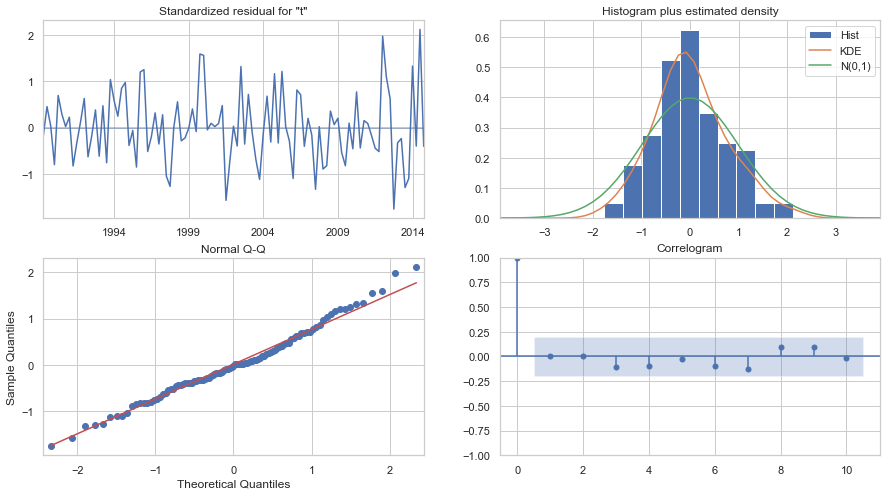

In [55]:
# model diagnostic
model_aic.plot_diagnostics(figsize=(15,8))
plt.show() # getting plots for residual part only (no seasonality and trend)

We can see that there is no lag that can predict the residual part because all the sticks are below the blue shaded region in the fourth plot which is significant. Secondly, the quantile-quantile plot (third plot) is fairly a straight line at an angle of 45 degrees. Thirdly, the variance of the residual is constant around zero. Lastly, the histogram of residuals shows the normal distribution. All these plots are showing the desired output.

In [56]:
import numpy as np
# forecasting from the start date we have in our testing data
forecast = model_aic.get_prediction(start=pd.to_datetime('2015-02-01'), end=pd.to_datetime('2021-11-01'), dynamic=False)
pred = forecast.predicted_mean
pred_ci = forecast.conf_int() # predicted confidence intervals

<a id ='section1'></a>
### Result:

*Figure 12*

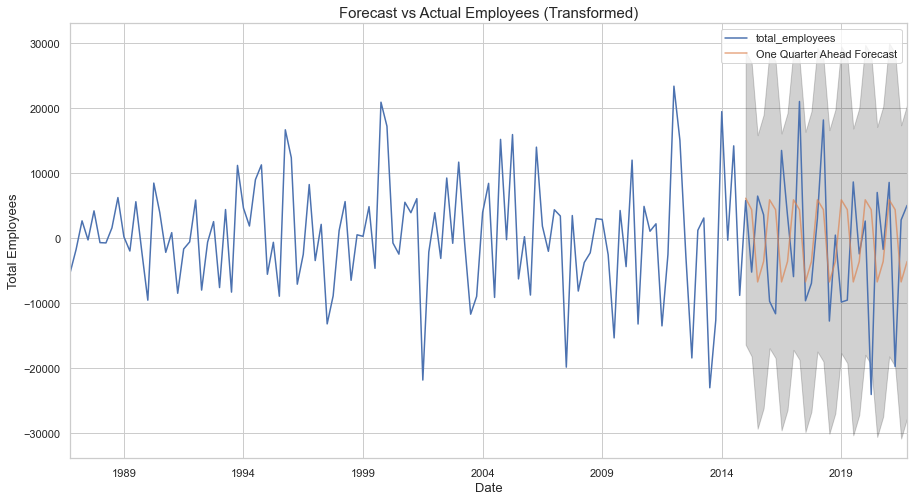

In [57]:
# plotting the result
ax = df_new['1986-11-01':].plot(label='Observed')
pred.plot(label='One Quarter Ahead Forecast', alpha=0.7, figsize=(15, 8))
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=0.2)
ax.set_xlabel('Date', fontsize=13)
ax.set_ylabel('Total Employees', fontsize=13)
ax.set_title('Forecast vs Actual Employees (Transformed)', fontsize=15)
plt.legend()
plt.show()

The predicted value corresponds to one quarter behind its respective timeframe. If we move the predicted values one step back then our prediction will seem to line up correctly with the actual values. Furthermore, the above plot is based on the transformed value, plotting both predicted and actual value in the original form would give a more clear picture.

In [58]:
# converting the predicted value back to the original value range
def value_retainer(df, lag):
    '''
    This function restores the original values from the transformed values.
    Argument:
    df -- the dataframe that contains the original non-transformed values 
    lag -- the number to determine the start of the test data
    Return: DataFrame
    '''  
    actual_test = df[(len(df) - lag):]
    df_pred = pred.to_frame()
    actual_test['actual_pred'] = df_pred['predicted_mean'] + actual_test['total_employees'] 
    # shifting the value up by one position
    final_df = actual_test.shift(-1)
    # removing the last null value row
    final_df.dropna(inplace=True)
    return final_df

In [59]:
final_df = value_retainer(df_forecast, 29)
# calculating the Root Mean Square (RMSE) value
rmse = np.sqrt(((final_df['total_employees'] - final_df['actual_pred']) ** 2).mean())
print('The RMSE of our model is ', round(rmse,2))

The RMSE of our model is  5301.25


The RMSE is low as compared to our total employee figures which are in the range of 200000. So, this suggests that in the range of 200000, our model's predictions will be far off by only 5301.25 which is a very good result.

*Figure 13*

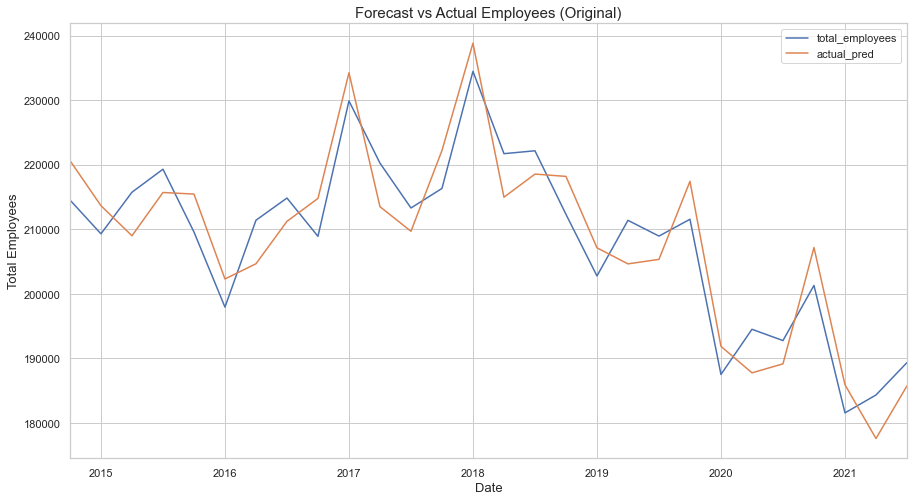

In [60]:
ax = final_df.plot(figsize=(15,8))
ax.set_xlabel('Date', fontsize=13)
ax.set_ylabel('Total Employees', fontsize=13)
ax.set_title('Forecast vs Actual Employees (Original)', fontsize=15)
plt.legend()
plt.show()

From the above plot, it is seen that our model was able to produce a good prediction for the unseen test data. 

### Future Prediction:

*Figure 14*

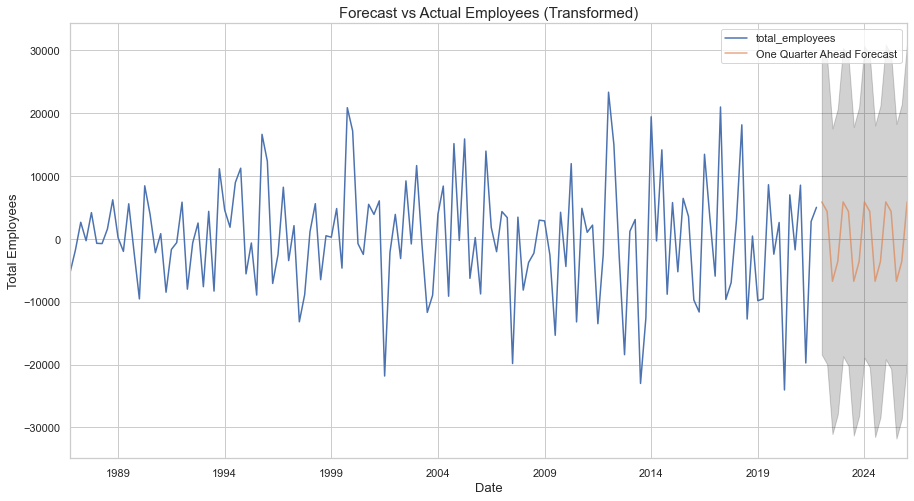

In [61]:
forecast2 = model_aic.get_prediction(start=pd.to_datetime('2022-02-01'), end=pd.to_datetime('2026-02-01'), dynamic=False)
pred2 = forecast2.predicted_mean
pred_ci2 = forecast2.conf_int()

# plotting the result
ax = df_new['1986-11-01':].plot(label='Observed')
pred2.plot(label='One Quarter Ahead Forecast', alpha=0.7, figsize=(15, 8))
ax.fill_between(pred_ci2.index, pred_ci2.iloc[:, 0], pred_ci2.iloc[:, 1], color='k', alpha=0.2)
ax.set_xlabel('Date', fontsize=13)
ax.set_ylabel('Total Employees', fontsize=13)
ax.set_title('Forecast vs Actual Employees (Transformed)', fontsize=15)
plt.legend()
plt.show()

As the plot has been drawn on the transformed dataset, it is hard to interpret the future result, but we can estimate the growth or fall of the data values by comparing it with the earlier forecasted plot (figure 12).

### Plot Comparison:

*Figure 15*

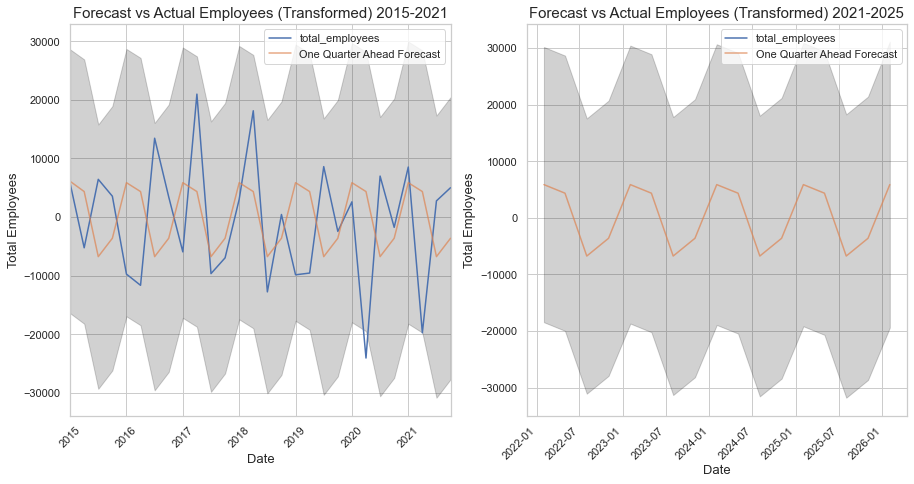

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(25,10))

ax1 = df_new['2015-02-01':].plot(label='Observed', ax=axes[0])
pred.plot(ax=axes[0], label='One Quarter Ahead Forecast', alpha=0.7, figsize=(15, 8), rot=45)
ax1.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=0.2)
ax1.set_xlabel('Date', fontsize=13)
ax1.set_ylabel('Total Employees', fontsize=13)
ax1.set_title('Forecast vs Actual Employees (Transformed) 2015-2021', fontsize=15)
ax1.legend()

ax2 = df_new['2022-02-01':].plot(label='Observed', ax=axes[1])
pred2.plot(ax=axes[1], label='One Quarter Ahead Forecast', alpha=0.7, figsize=(15, 8), rot=45)
ax2.fill_between(pred_ci2.index, pred_ci2.iloc[:, 0], pred_ci2.iloc[:, 1], color='k', alpha=0.2)
ax2.set_xlabel('Date', fontsize=13)
ax2.set_ylabel('Total Employees', fontsize=13)
ax2.set_title('Forecast vs Actual Employees (Transformed) 2021-2025', fontsize=15)
ax2.legend()
plt.show()

**Insights:**

From the above comparison plot, it can be seen that the predicted values in both graphs fluctuate in a similar range. Thus, it can be stated that the concrete growth for the Information, Media and Telecommunication sector of the tech industry might not be visible in the next five years. On the other hand, we saw in figure 7 that the combined trend of workers in different states is growing, which can be seen in figure 16 too. Hence, we make an inference that the growth in employee participation in the tech industry in the future will be more due to the growth contribution from the Professional, Scientific and Technical Services sector of the tech industry.

*Figure 16*

In [63]:
df_whole = forecast_maker(df_forecast_org)
df_whole.set_index('date', inplace=True)
df_whole.head(5)

,total_employees
date,
1986-08-01,457123.32
1986-11-01,466863.60
1987-02-01,477902.00
1987-05-01,477255.37
1987-08-01,478489.26


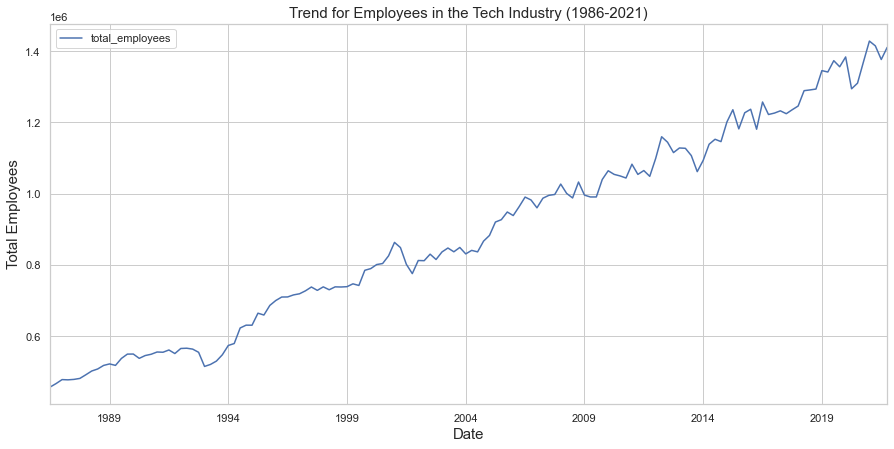

In [64]:
ax = df_whole.plot(figsize=(15,7))
ax.set_ylabel('Total Employees', fontsize=15)
ax.set_xlabel('Date', fontsize=15)
ax.set_title('Trend for Employees in the Tech Industry (1986-2021)', fontsize=15)
plt.show()

# Possible Further Development

There are a few limitations of the analysis. They are:
1. The dataset can be experimented with other transformation methods such as log, square root, etc., to achieve the stationarity at a higher significance level.
2. The hyperparameter tuning using a grid search can be extended to numbers other than only 0 and 1 to get the lowest AIC score to further improve the model.
3. The model building process can be experimented with other techniques such as prophet, lstm, etc.
4. Similar models can be built to obtain the forecasts at the state, age, occupation and other levels.